In [395]:
# Imports
import os, sys
from pathlib import Path
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Add local codebase to path
home = str(Path.home())
sys.path.insert(1, f'{home}/Documents/woonfraude/codebase')

# Import own core module
import core, build_model
pd.set_option('display.max_columns', None)

In [101]:
pd.set_option('display.max_colwidth', -1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# OPTIONAL: Re-download and process adres/zaken/stadia/personen tables. Uncomment next line to run these steps.
# core.main(DOWNLOAD=True, FIX=True, ENRICH=True, ADD_LABEL=True, EXTRACT_FEATURES=True, SPLIT_DATA=True, BUILD_MODEL=False)

In [368]:
dfs = core.load_dfs('1')
print(dfs.keys())

dict_keys(['adres', 'bag', 'personen', 'stadia', 'zaken'])


In [369]:
adres = dfs['adres']
zaken = dfs['zaken']
stadia= dfs['stadia']

In [370]:
# zaken alleen vanaf 2010 
zaken['year'] = zaken['begindatum'].dt.year
zaken['month'] = zaken['begindatum'].dt.month
zaken = zaken[(zaken['beh_code'] != 'W_GALERIJF') & (zaken['year'] > 2009) & (zaken['beh_code'] != 'H_WON_SCAN')]

General notes:
- Kies voor NaN of None -> kies NaN

# Data kwaliteit adres

In [15]:
adres.head()

,adres_id,straatcode,postcode,sdl_code,brt_code,pvh_cd,pvh_omschr,sbw_omschr,sbv_omschr,wzs_id,wzs_buurtcode_os_2015,wzs_buurtnaam_os_2015,wzs_buurtcombinatiecode_os_2015,wzs_buurtcombinatienaam_os_2015,wzs_22gebiedencode_os_2015,wzs_22gebiedennaam_os_2015,wzs_rayoncode_os_2015,wzs_rayonnaam_os_2015,wzs_stadsdeelcode_os_2015,wzs_stadsdeelnaam_os_2015,wzs_alternatieve_buurtennaam_os_2015,wzs_alternatieve_buurtencode_os_2015,wzs_update_datumtijd,wzs_geom,wzs_lon,wzs_lat,wzs_wijze_verrijking_geo,wzs_22gebiedencode_2015,wzs_22gebiedennaam_2015,sttnaam,hsnr,hsltr,toev,brtcombi_code,brtcombi_naam,sdl_naam,xref,yref,brt_naam,a_dam_bag,landelijk_bag,sbw_code,sbv_code,inwnrs,kmrs,hvv_dag_tek,max_vestig_dtm
0,34859.0,4227.0,1055TM,E,B,11,1 hoog,Huurwoning,"Geen Bijzonderheden, Nvt",87985896,None,None,None,None,None,None,None,None,None,None,None,None,2019-04-04 13:07:55.962152,None,NaN,NaN,None,None,None,Bestevâerstraat,221,None,1,37,Landlust,West,118914.0,488108.0,L andlust Noord,03630000045631,0363200000045631,1.0,99.0,2.0,3.0,1952-01-24 00:00:00+01,2014-02-22 00:00:00+01
1,292087.0,31682.0,1068JK,F,E,11,1 hoog,Huurwoning,Woning In Beschermde Omgeving(Wibo),87985920,None,None,None,None,None,None,None,None,None,None,None,None,2019-04-04 13:07:55.962152,None,NaN,NaN,None,None,None,S. F. van Ossstraat,229,None,None,81,Osdorp-Oost,Nieuw-West,115835.0,485464.0,Osdorp Zuidoost,03630000260956,0363200000260956,1.0,7.0,1.0,2.0,2005-10-28 00:00:00+02,2019-02-06 00:00:00+01
2,292118.0,31682.0,1068JR,F,E,31,3 hoog,Eigen woning,"Geen Bijzonderheden, Nvt",87985921,None,None,None,None,None,None,None,None,None,None,None,None,2019-04-04 13:07:55.962152,None,NaN,NaN,None,None,None,S. F. van Ossstraat,260,None,None,81,Osdorp-Oost,Nieuw-West,115705.0,485454.0,Osdorp Zuidoost,03630000260987,0363200000260987,2.0,99.0,1.0,4.0,None,2005-05-30 00:00:00+02
3,162578.0,18546.0,1011RH,A,I,41,4 hoog,Huurwoning,"Zelfst Hat 1p, Z1",87985929,None,None,None,None,None,None,None,None,None,None,None,None,2019-04-04 13:07:55.962152,None,NaN,NaN,None,None,None,Jonas Daniël Meijerplein,40,None,None,4,Nieuwmarkt/Lastage,Amsterdam-Centrum,122109.0,486645.0,Waterloopleinbuurt,03630000156782,0363200000156782,1.0,10.0,2.0,1.0,2013-01-17 00:00:00+01,2013-03-01 00:00:00+01
4,62438.0,7196.0,1078EC,K,A,31,3 hoog,Huurwoning,"Geen Bijzonderheden, Nvt",87985935,None,None,None,None,None,None,None,None,None,None,None,None,2019-04-04 13:07:55.962152,None,NaN,NaN,None,None,None,Churchill-laan,205,None,3,52,Scheldebuurt,Zuid,120975.0,484459.0,Wielingenbuurt,03630000068177,0363200000068177,1.0,99.0,3.0,4.0,1985-05-15 00:00:00+02,2014-09-24 00:00:00+02


# Data kwaliteit zaken

In [397]:
zaken.head()

,adres_id,wvs_nr,begindatum,einddatum,beh_code,beh_oms,afg_code_beh,afs_code,afs_oms,afg_code_afs,kamer_aantal,nuttig_woonoppervlak,vloeroppervlak_totaal,bedrag_huur,eigenaar,wzs_id,zaak_id,wzs_update_datumtijd,mededelingen,year,month
0,213644.0,4.0,2011-06-24,2011-07-01,VMELD,Melding/zaak openen,VTBD,VCAMP,Campuscontract,VTBD,2.0,26.0,33.0,312.0,Stadgenoot,118805225,213644_4,2019-04-04 14:06:31.815258+00:00,None,2011,6
1,298274.0,1.0,2011-05-24,2011-10-05,GBS_0,Leeg B0,CNV,PNHAN,Niet Handhaven,VTBD,3.0,38.0,48.0,353.0,Particulier,118805252,298274_1,2019-04-04 14:06:31.815258+00:00,None,2011,5
2,354619.0,1.0,2011-08-01,2014-06-19,VMELD,Melding/zaak openen,VTBD,PTVEIND,Tijdelijk verhuur beeindigd,VTBD,4.0,57.0,66.0,312.0,Ymere West,118805346,354619_1,2019-04-04 14:06:31.815258+00:00,ANR(19-JUN-14): Termijn om te kunnen verlengen is verstreken. Geen reactie van Ymere op rappel gehad. Zaak nu afgesloten.\n,2011,8
3,337628.0,1.0,2011-09-20,2011-12-28,GBS_0,Leeg B0,CNV,VHVV,HVV verleend,VTBD,3.0,34.0,38.0,374.0,Particulier,118805347,337628_1,2019-04-04 14:06:31.815258+00:00,"PAW(28-DEC-11): Econ. geb. en : 93 ptn, dus hvv akkoord\nDEE(27-DEC-11): VDR. E. LUDWIG\n",2011,9
4,1970327.0,1.0,2011-09-22,2011-09-23,HAN_OVER,Overige (zie opmerkingenveld),HAN,PVKOOP,Woning is verkocht,VTBD,2.0,NaN,27.0,300.0,Particulier,118805348,1970327_1,2019-04-04 14:06:31.815258+00:00,"ROO(22-SEP-11): gesplitst, nu eig/bew",2011,9


Algemeen:
- Mededelingen veld onduidelijke functie
- Als een zaak is aangemaakt en het blijkt toch om een andere fraude categorie of eigenaar oid te gaan wordt de zaak afgesloten en een nieuwe zaak gemaakt. Dit is niet te volgen en zorgt voor vervuiling
- Voor dit project nemen we alleen meldingen vanaf 2010 omdat vanaf dan eenduidiger geregistreerd wordt 

Woonfraude label:
- Geen duidelijk label fraude in de data. Dit wordt nu met behulp van met de functie add_binary_label_zaken (zie github) regels geinteperteerd op basis van afs_oms (zaken) en sta_oms (stadia)

Categorie:
- Geen duidelijke categorieen die nu worden geinterperteerd op basis van beh_oms (zaken)
- Organische groei van categorieen (beh_oms, sta_oms)
- Onduidelijke definities categorieen (beh_oms, sta_oms)
- De categorie woningkwaliteit & vergunning en beheer laten we weg vallen omdat dit buiten de scope van T&H valt
- Missende data wordt vervangen met column mode

Numeriek/ordinal:
- Aantal kamers: Tel je hier aparte slaapkamers? Is 0 kamers dan een studio? En klopt het dat sommige huizen >11 kamers hebben? Studentenhuis, verzorgingstehuis?
- Hoe komt men aan de data voor het veld bedrag_huur?
- Missende data wordt vervangen met column mean

Datum:
- Missende data wordt vervangen met column mean




In [389]:
# Percentage is nan values in column
columns_isna_percentage(zaken)

adres_id                 0.00 
wvs_nr                   0.00 
begindatum               0.00 
einddatum                19.87
beh_code                 0.00 
beh_oms                  0.00 
afg_code_beh             0.00 
afs_code                 19.87
afs_oms                  19.87
afg_code_afs             19.87
kamer_aantal             5.22 
nuttig_woonoppervlak     15.33
vloeroppervlak_totaal    2.68 
bedrag_huur              14.29
eigenaar                 0.00 
wzs_id                   0.00 
zaak_id                  0.00 
wzs_update_datumtijd     0.00 
mededelingen             14.57
year                     0.00 
month                    0.00 
dtype: float64

### Open tekstvelden
Aanwezige tekstvelden kolommen: mededelingen

In [398]:
zaken['mededelingen']

0        None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
1        None          

### Datum
Aanwezige datum columns: begindatum, einddatum, wzs_update_datumtijd
- Einddatum voor begindatum
- Als er een datum mist, wordt de missende waarde geimpute met de mean van de column. Dit zou nog anders kunnen

2019    69039
Name: wzs_update_datumtijd, dtype: int64


/home/sdekkers/.local/lib/python3.6/site-packages/pandas/plotting/_core.py:998: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2019.0, right=2019.0
  ax.set_xlim(left, right)


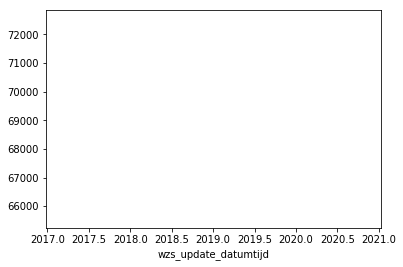

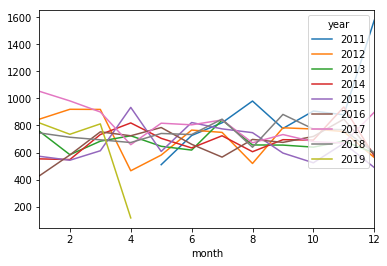

In [400]:
date_quality_assessment(zaken, 'wzs_update_datumtijd')

In [392]:
# Analyse begindatum en einddatum 

# Zaken waarvan een datum in de toekomst ligt
today = pd.to_datetime('today')
zaken.loc[zaken['begindatum'] > today].shape
zaken.loc[zaken['einddatum'] > today].shape

# Accuracy fail: begindatum is eerder dan einddatum in 16 gevallen
zaken.loc[zaken['begindatum'] > zaken['einddatum']].shape

(0, 21)

(0, 21)

(16, 21)

### Categorical data
Aanwezige categorische velden: afs_oms, beh_oms

In [401]:
zaken['beh_oms'].value_counts()

Melding/zaak openen                                16201
Leeg B0                                            7495 
ZKL Doorverhuur                                    3558 
Hotline                                            3219 
ZKL illegaal hotel/Shortstay                       2692 
Zebra                                              2104 
ZKL Doorzon Drugs                                  1615 
Leeg BX                                            1518 
Leegstand administratief                           1448 
ZL melding publiek anoniem                         1340 
BR_BC                                              1079 
Leegstand feitelijk                                790  
Safari                                             774  
ZL melding publiek niet anoniem                    769  
In onderzoek genomen door Handhaving               696  
ZKL Pension/kamerverhuur                           670  
LAA                                                661  
Woningdelen                    

### Numerieke kolommen
Aanwezige numerieke kolommen: kamer_aantal, nuttig_woonoppervlak, vloeroppervlak_totaal, bedrag_huur

column: bedrag_huur

max range: mean + 3 sigma 1193.4549999999872


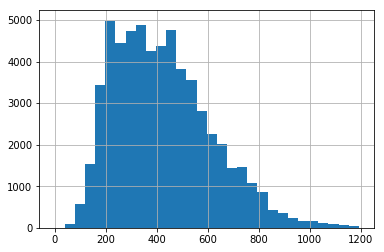

Q1: 276.0
Q2: 402.0
Q3: 544.0
outlier IQR method: value < -126.0 or > 946.0


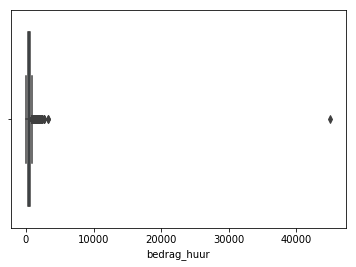

In [402]:
# numerical_quality_assessment(zaken, 'kamer_aantal', True, True)
# numerical_quality_assessment(zaken, 'nuttig_woonoppervlak', True, True)
# numerical_quality_assessment(zaken, 'vloeroppervlak_totaal', True, True)
numerical_quality_assessment(zaken, 'bedrag_huur', True, True)

In [ ]:
# Calculate zscore for multiple columns
l = ['kamer_aantal', 'nuttig_woonoppervlak', 'vloeroppervlak_totaal', 'bedrag_huur']

for col in l:
    colnaam = col + '_z'
#     zaken[col].fillna((zaken[col].mean()), inplace=True)
    zaken[colnaam] = zscore(zaken[col])
    
outlier_threshold = 3
zaken[zaken['bedrag_huur_z'] > outlier_threshold]
zaken[zaken['bedrag_huur_z'] < outlier_threshold]

## Bias in de data
Meldingen zijn geen random set van huishoudens in Amsterdam -> sample bias (happens when the collected data doesn't accurately represent the environment the program is expected to run into)

Sample bias:
- Geografische bias

In [ ]:
# Run feature importance

# Algemene functionaliteit

In [393]:
def columns_isna_percentage(df):
    return df.isna().mean().round(4) * 100

### Datum data

In [382]:
def date_quality_assessment(df, col):
    print(df[col].dt.year.value_counts().sort_index())
    
    # analyse per jaar     
    df.groupby([df[col].dt.year]).size().plot()
    plt.show()
    
    # analyse per jaar per maand
    df_g = zaken.groupby([zaken['year'], zaken['month']]).size().reset_index()
    df_g = df_g.rename(columns={0:'size'})
    df_g_p = df_g.pivot(index='month', columns='year', values='size')
    df_g_p.plot()
    plt.show()

### numerieke verklarende kolommen

In [294]:
def numerical_quality_assessment(df, col, hist, boxplot):
    print('column:', col)
    print()

    if hist == True:
        print('max range: mean + 3 sigma', df[col].quantile(0.9973))
        outlier_treshold = df[col].quantile(0.9973)
        df[col].hist(range=(0, outlier_treshold), bins=30)
        plt.show()
            
    if boxplot == True:
        # Outlier detectie: IQR method
        print('Q1:', df[col].quantile(.25))
        print('Q2:', df[col].quantile(.50))
        print('Q3:', df[col].quantile(.75))
        
        outlier_min = df[col].quantile(.25) - ((df[col].quantile(.75) - df[col].quantile(.25)) * 1.5)
        outlier_max = df[col].quantile(.75) + ((df[col].quantile(.75) - df[col].quantile(.25)) * 1.5)
        print('outlier IQR method: value <', outlier_min, 'or >', outlier_max)
        
        sns.boxplot(x=df[col])
        plt.show()
        